In [8]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

In [2]:
X, y = make_blobs(n_samples=500, 
                  n_features= 2,
                  centers= 4,
                  cluster_std= 1,
                  center_box= (-10.0, 10.0),
                  shuffle = True,
                  random_state = 1)

range_n_clusters = [2, 3, 4, 5, 6]

In [3]:
X

array([[-6.92324165e+00, -1.06695320e+01],
       [-8.63062033e+00, -7.13940564e+00],
       [-9.63048069e+00, -2.72044935e+00],
       [-2.30647659e+00,  5.30797676e+00],
       [-7.57005366e+00, -3.01446491e+00],
       [-1.00051011e+00,  2.77905153e+00],
       [-4.81826839e+00, -2.77214822e+00],
       [-5.33964799e+00, -1.27625764e+00],
       [-7.94308840e+00, -3.89993901e+00],
       [-5.54924525e+00, -3.41298968e+00],
       [-5.14508990e+00, -9.54492198e+00],
       [-7.09669936e+00, -8.04074036e+00],
       [-5.82641512e+00, -1.96346196e+00],
       [-1.83198811e+00,  3.52863145e+00],
       [-7.34267235e+00, -3.16546482e+00],
       [-7.34072825e+00, -6.92427252e+00],
       [-7.94653906e+00, -3.36768655e+00],
       [-8.24598536e+00, -8.61315821e+00],
       [-1.98197711e+00,  4.02243551e+00],
       [-4.35098035e+00, -3.69476678e+00],
       [-1.04768696e+01, -3.60318139e+00],
       [-1.10195984e+01, -3.15882031e+00],
       [-5.17255904e+00, -4.31835971e+00],
       [-2.

C:\Users\HP\AnacondaX\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AnacondaX\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HP\AnacondaX\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AnacondaX\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

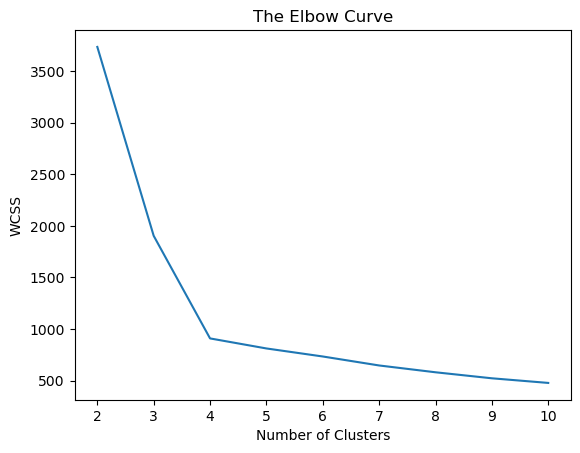

In [4]:
wcss = []
for i in range(2,11):
    kmeans= KMeans(n_clusters= i, init= "k-means++", random_state= 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2,11),wcss)
plt.title("The Elbow Curve")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [5]:
clusterer = KMeans(n_clusters= 4, random_state= 10)
cluster_labels = clusterer.fit_predict(X)
cluster_labels

C:\Users\HP\AnacondaX\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AnacondaX\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([2, 2, 3, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 1, 0, 3, 3,
       0, 1, 0, 0, 1, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 3, 2, 3, 0, 3, 1, 0,
       0, 2, 3, 0, 1, 1, 1, 3, 3, 0, 2, 3, 3, 3, 3, 0, 1, 1, 3, 0, 1, 0,
       2, 0, 3, 3, 2, 3, 0, 2, 0, 0, 2, 0, 0, 3, 1, 1, 3, 1, 1, 3, 3, 1,
       3, 3, 1, 2, 3, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 3, 1, 0, 0, 1, 1, 3,
       0, 2, 1, 3, 1, 3, 1, 0, 1, 0, 3, 2, 2, 3, 0, 3, 1, 2, 2, 0, 1, 3,
       3, 3, 3, 2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 3, 3, 1, 2,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 2, 2, 0, 1, 2, 3, 0, 2, 1, 3,
       3, 3, 3, 2, 0, 3, 1, 2, 2, 3, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 0, 2,
       2, 1, 2, 3, 1, 0, 0, 2, 0, 3, 2, 0, 3, 0, 3, 2, 0, 0, 0, 1, 3, 1,
       0, 2, 3, 0, 3, 3, 3, 1, 3, 1, 2, 3, 2, 3, 1, 1, 3, 2, 1, 2, 0, 3,
       2, 2, 2, 2, 0, 3, 2, 3, 0, 1, 1, 0, 0, 1, 3, 0, 3, 1, 0, 1, 3, 3,
       1, 0, 2, 2, 3, 3, 3, 0, 1, 1, 0, 1, 3, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 0, 3, 3, 3, 0, 0, 3, 2, 1, 2, 2, 2, 0, 3,

C:\Users\HP\AnacondaX\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AnacondaX\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


for n_clusters =  2 the average silhouette score is :  0.7049787496083262


C:\Users\HP\AnacondaX\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AnacondaX\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


for n_clusters =  3 the average silhouette score is :  0.5882004012129721


C:\Users\HP\AnacondaX\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AnacondaX\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


for n_clusters =  4 the average silhouette score is :  0.6505186632729437


C:\Users\HP\AnacondaX\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AnacondaX\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


for n_clusters =  5 the average silhouette score is :  0.56376469026194


C:\Users\HP\AnacondaX\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AnacondaX\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


for n_clusters =  6 the average silhouette score is :  0.4504666294372765


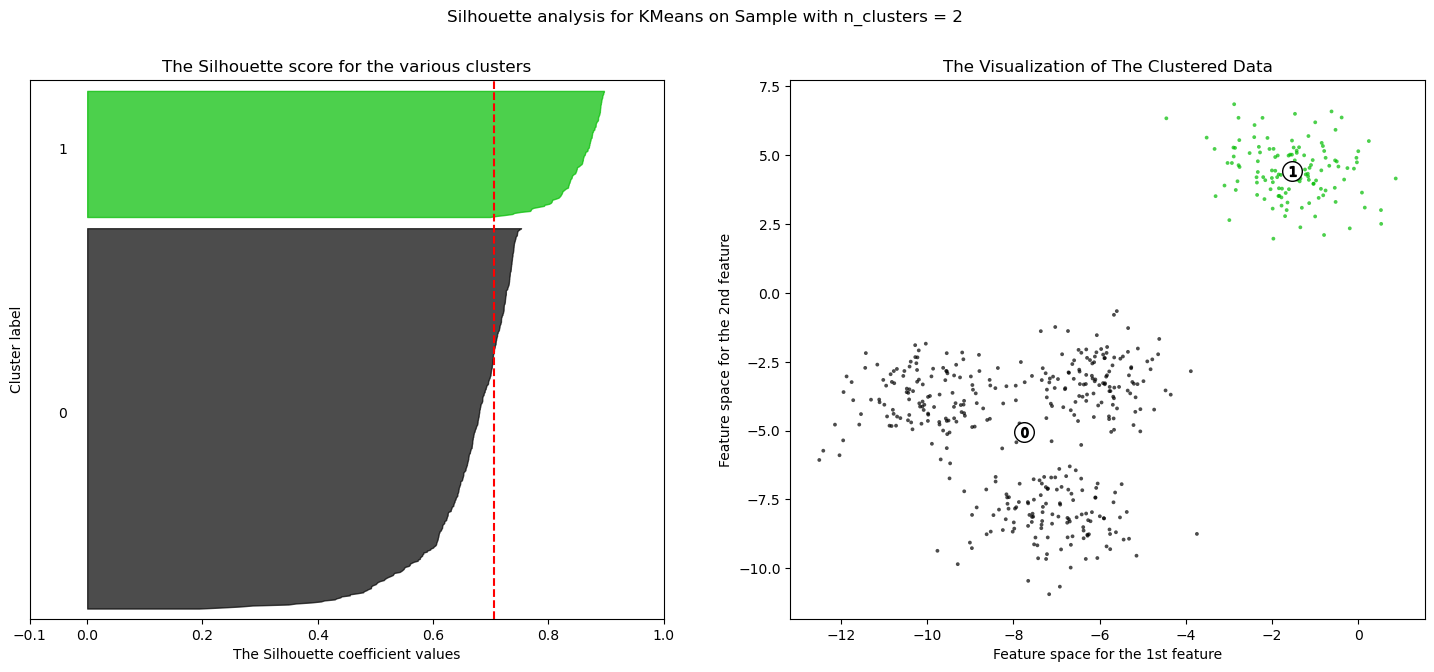

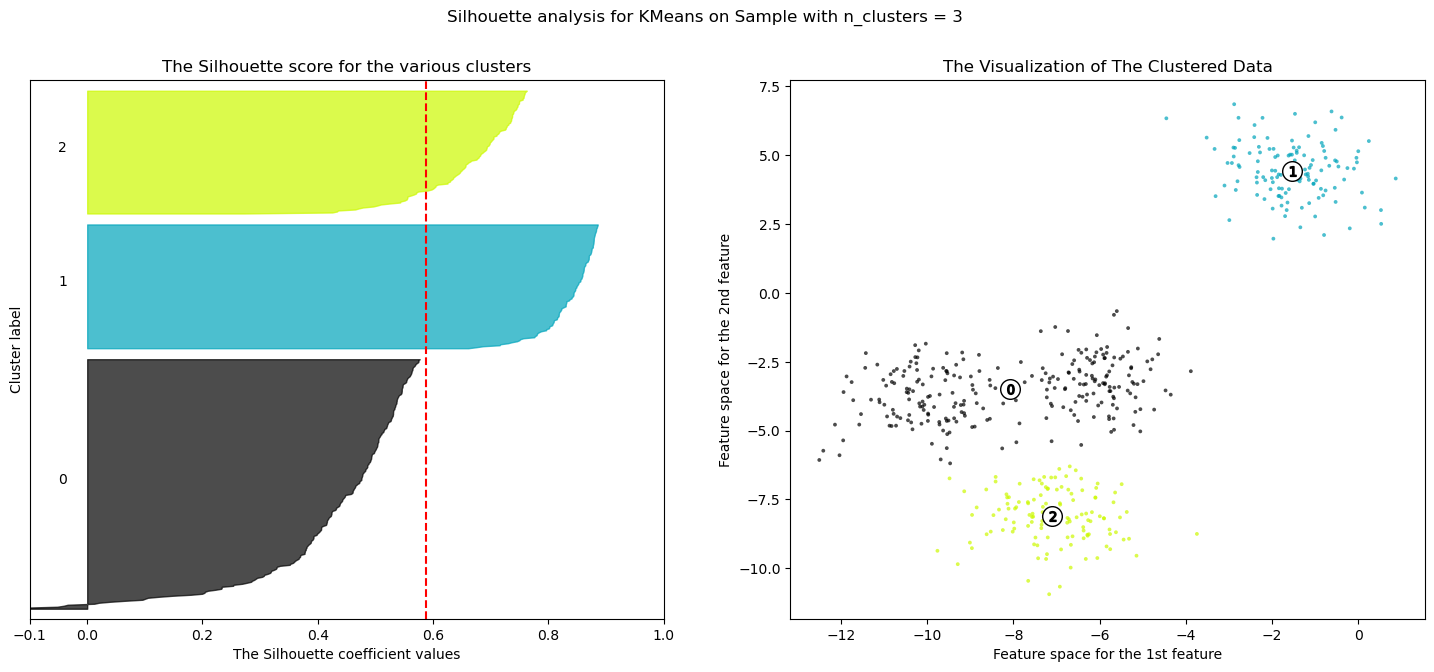

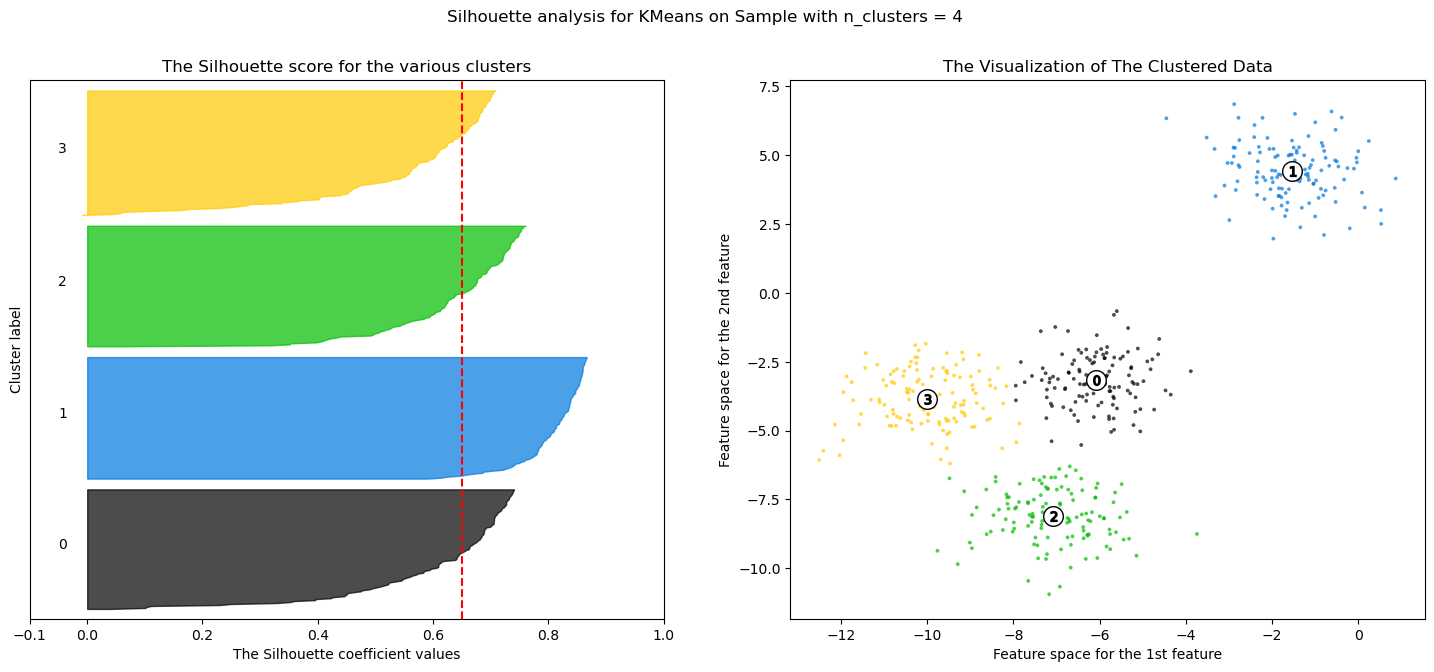

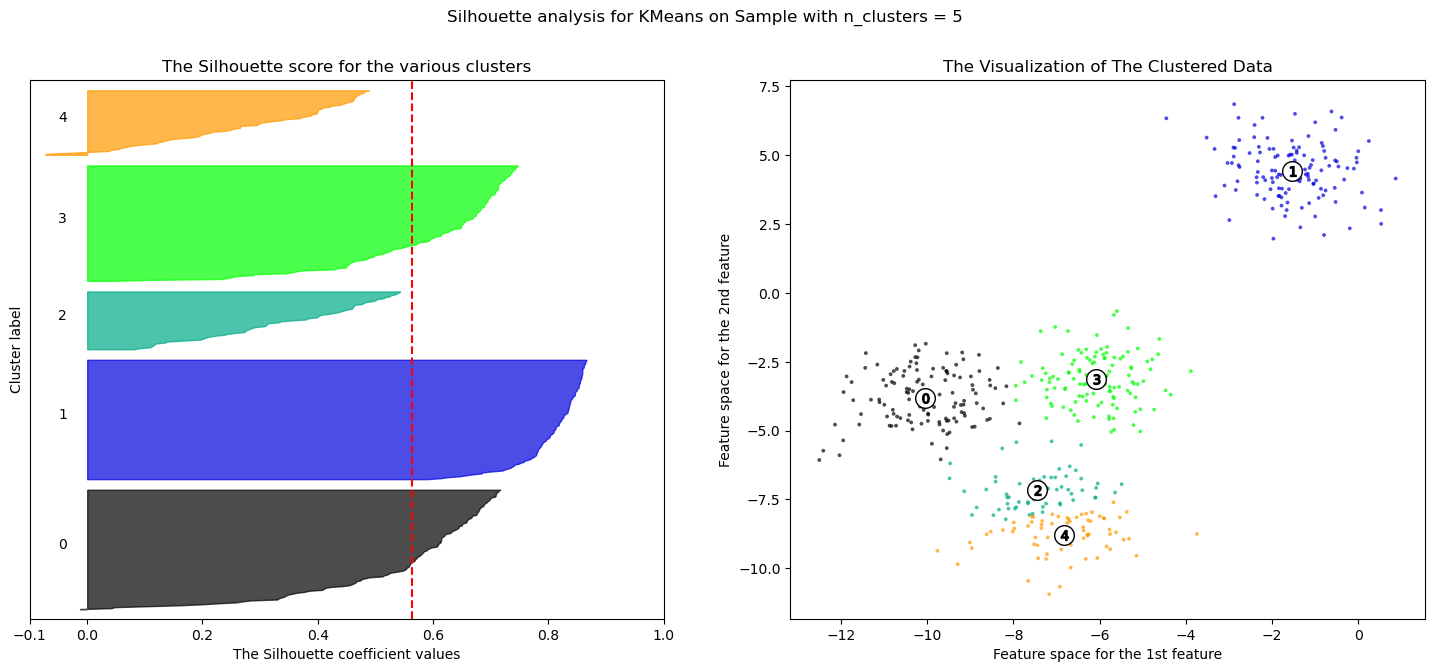

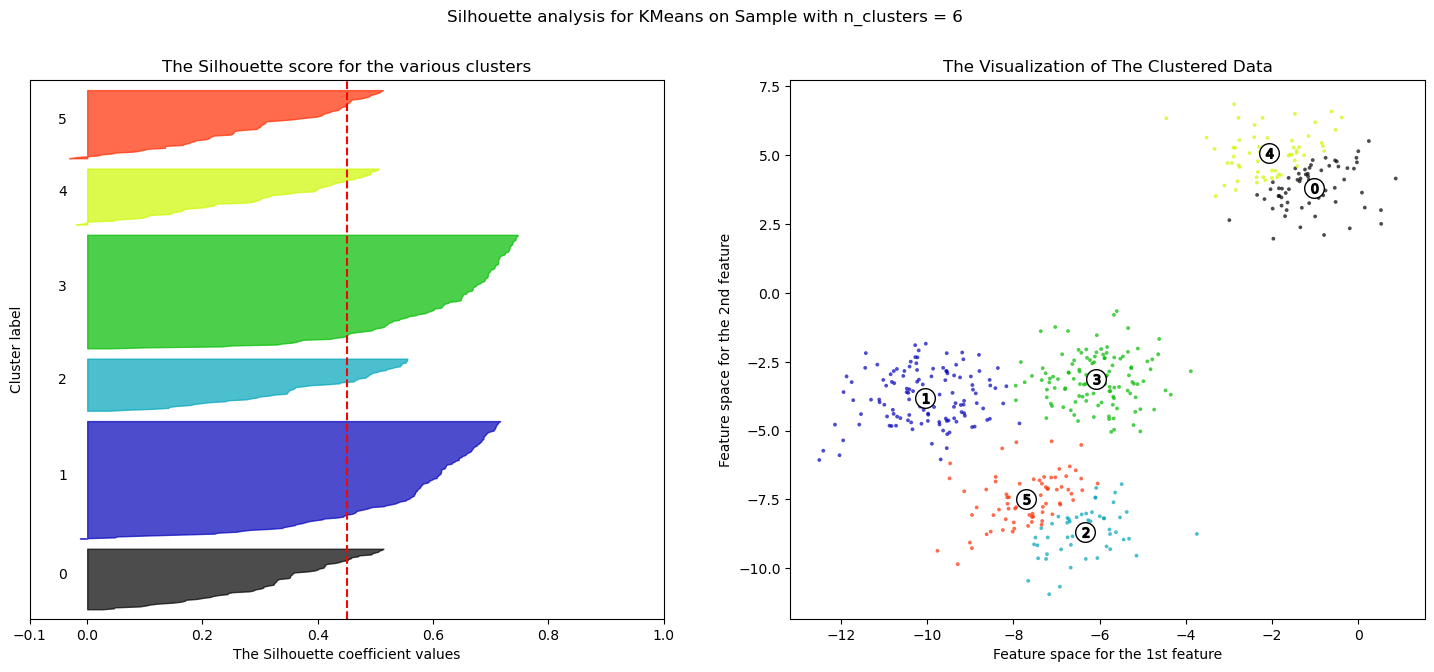

In [6]:
for n_clusters in range_n_clusters:
    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18,7)
    # the first subplot is the silhoutte plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    # initialize the clusterer with n_clusters values and a random generator 
    clusterer = KMeans(n_clusters = n_clusters, random_state = 10)
    cluster_labels = clusterer.fit_predict(X)
    
    # the silhoutte score gives average value for all the samples. This gives a perspective into the density and seperation 
    # and density of the formed clusters
    silhouette_average = silhouette_score (X, cluster_labels)
    print("for n_clusters = ", n_clusters,
         "the average silhouette score is : ", silhouette_average)
    
    # compute the silhoutte scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range (n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor = color, 
                         edgecolor= color, alpha= 0.7)
        ax1.text(-0.05, y_lower + 0.5 *  size_cluster_i, str(i))
        y_lower= y_upper + 10
        
    ax1.set_title("The Silhouette score for the various clusters")
    ax1.set_xlabel("The Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    # The vertical line for average silhoutte score of all the values  
    ax1.axvline(x= silhouette_average, color= "red", linestyle="--")
    
    # Clear the yaxis label/ticks 
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1.0])
    
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker = '.', s= 30, lw = 0, alpha= 0.7, c=colors, edgecolor= 'k')

    #labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circle at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker = 'o', s= 200, alpha= 1, c = "white", edgecolor= 'k')

    for i, c in enumerate (centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha= 1, s=50, edgecolor= "k")

    ax2.set_title("The Visualization of The Clustered Data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle("Silhouette analysis for KMeans on Sample with n_clusters = %d" % n_clusters)
    
plt.show()
